# Customer Churn Data Science Project

Dataset: https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn

## Preparations

We will first import a few libraries and our data. We will be using pandas and scikit learn for this project.

In [3]:
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt

# Import data
df = pd.read_csv("data.csv")

/Users/luoyihang/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Data Cleaning

In [4]:
# Check missing values & Dtype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [3]:
# Delete blanks before and after the column name
df.columns = df.columns.str.strip()

In [8]:
# Create a seperate categorical variables dataframe
categorical_columns = ["Tenure", "Geography", "Gender", "NumOfProducts", "HasCrCard",
                       "IsActiveMember", "Exited", "Complain", "Satisfaction Score", "Card Type"]
categorical_variables = df[categorical_columns]

In [9]:
# Create a seperate numerical variables dataframe
numerical_columns = [
    col for col in df.columns if col not in categorical_columns]
numerical_variables = df[numerical_columns]
numerical_variables["Tenure"] = df["Tenure"]

/var/folders/1_/rjl829vx0rx5cxdq6wwpfp0c0000gn/T/ipykernel_16090/2956093223.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_variables["Tenure"] = df["Tenure"]


In [10]:
# Check the unique value for each categorical variable and sort them
unique_value = {c: sorted(list(df[c].unique()))
                for c in categorical_variables.columns}
pprint(unique_value)

{'Card Type': ['DIAMOND', 'GOLD', 'PLATINUM', 'SILVER'],
 'Complain': [0, 1],
 'Exited': [0, 1],
 'Gender': ['Female', 'Male'],
 'Geography': ['France', 'Germany', 'Spain'],
 'HasCrCard': [0, 1],
 'IsActiveMember': [0, 1],
 'NumOfProducts': [1, 2, 3, 4],
 'Satisfaction Score': [1, 2, 3, 4, 5],
 'Tenure': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}


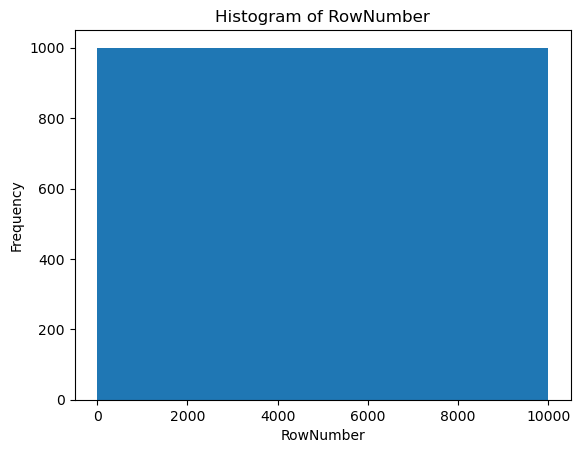

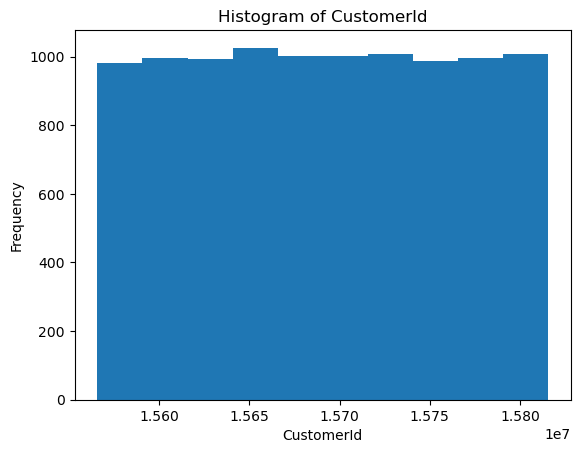

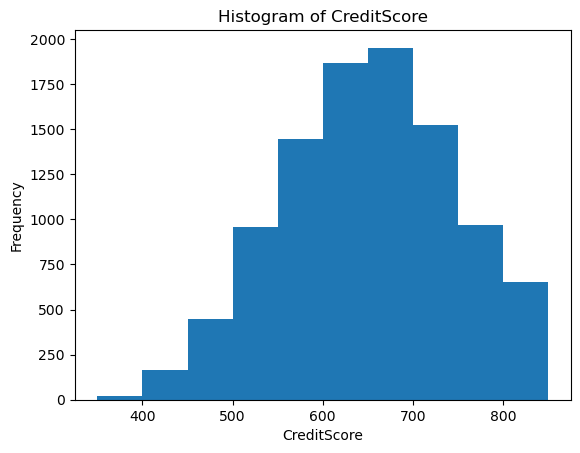

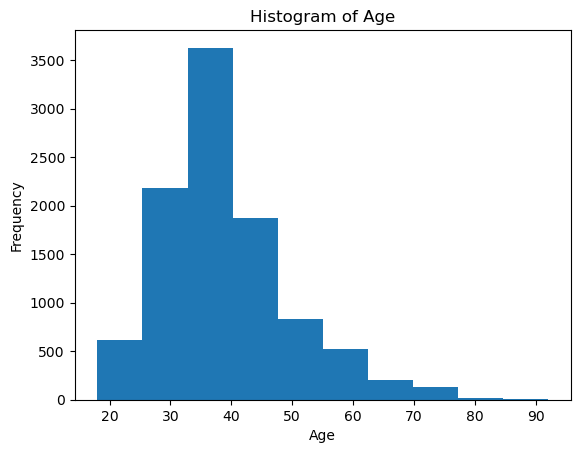

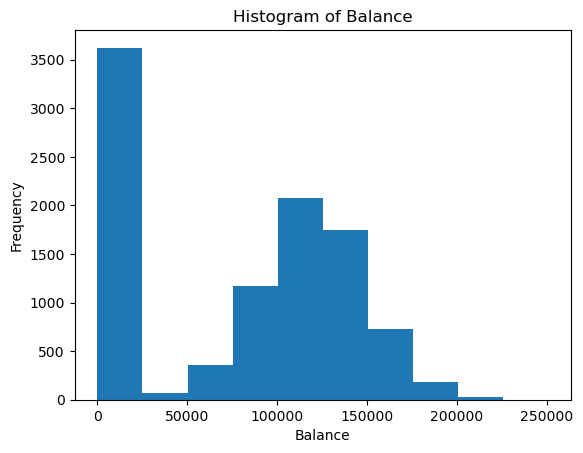

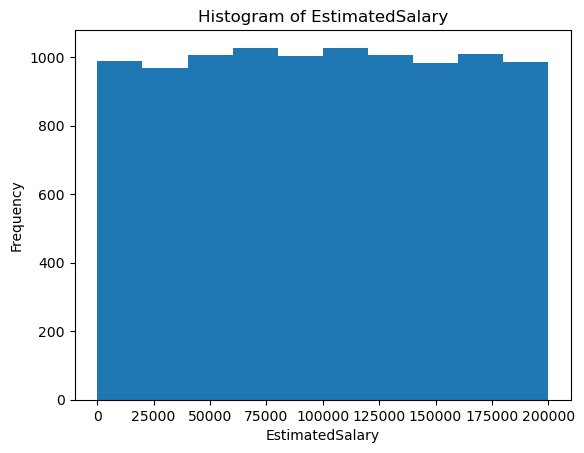

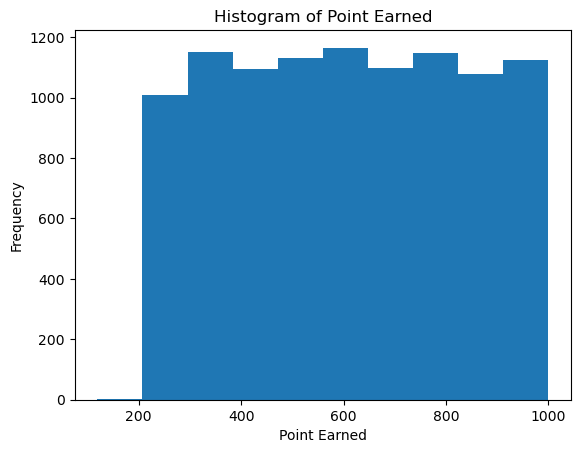

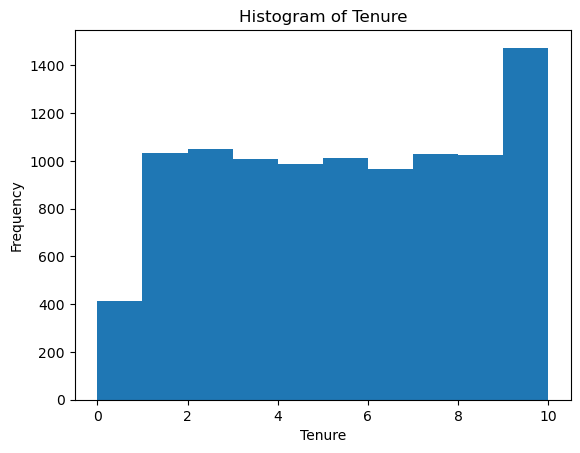

In [11]:
# Create histograms for each numerical column
for col in numerical_variables.select_dtypes(include=['number']):
    plt.figure()
    plt.hist(numerical_variables[col])
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()